In [1]:
using Distributed
addprocs(44);

In [2]:
using pulse_input_DDM, Flatten

In [3]:
θ_generative = θchoice(θz=θz(σ2_i = 5., B = 8., λ = -1., σ2_a = 20., σ2_s = 0.5,
    ϕ = 0.8, τ_ϕ = 0.05), bias=2., lapse=0.05);

In [4]:
x_generative = collect(Flatten.flatten(θ_generative));

In [5]:
n = 53

53

## Fit 20K trials

In [6]:
lb = [0., 2.,  -5., 0.,   0.,  0., 0.005, -5.0, 0.0]
ub = [30., 100., 5., 200., 10., 1.2,  1., 5.0, 1.0];

In [7]:
_, data_20K = synthetic_data(n ;θ=θ_generative, ntrials=20_000, rng=1, dt=1e-2);

In [8]:
fit = vcat(trues(9));
x0 = vcat([0.1, 15., -0.1, 20.,  0.5, 0.2,  0.008], [0.,  0.01]);

9-element Array{Float64,1}:
  0.1  
 15.0  
 -0.1  
 20.0  
  0.5  
  0.2  
  0.008
  0.0  
  0.01 

In [9]:
loglikelihood(θ_generative, data_20K)

-6232.528137192193

In [10]:
using Random

function fit_x0(rng, fit, x0, lb, ub, data)

    Random.seed!(rng)
    x00 = lb + (ub - lb) .* rand(length(x0))
    x00[2] = 15.
    options = choiceoptions(x0=x00, fit=fit, lb=lb, ub=ub)
    model, output = optimize(data, options; f_tol=1e-9, extended_trace=true, show_trace=true)
    
end

fit_x0 (generic function with 1 method)

In [11]:
output = map(rng-> fit_x0(rng, fit, x0, lb, ub, data_20K), 1:3)
traces = map(y-> hcat(map(x-> x.metadata["x"], y[2].trace)...), output)

Fminbox
-------
Initial mu = 0.0258827

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 0.0258827

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     1.892323e+04     2.401371e+04
 * Current step size: 1.0
 * time: 5.507469177246094e-5
 * g(x): [-45.58319281741931, -45.19493132404622, -802.3906401183569, -101.69631158340064, -177.0825933248963, -1199.445618424235, 956.3128834200883, 717.721719883081, -24013.71066163247]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 * x: [7.081000369861408, 15.0, -1.8729303166393252, 1.581856678112148, 4.886128300795011, 0.25316184259024316, 0.9521567581365553, 4.999046588986136, 0.25166

    50     6.233878e+03     1.662952e+01
 * Current step size: 1.0
 * time: 1304.0021350383759
 * g(x): [0.137621520576177, -0.5223496807656108, 1.6390857860433443, -1.0947600603359746, 4.48538338520929, 1.7635341068224897, -15.410957869298958, -2.1645175696077894, 16.629515051426594]
 * ~inv(H): [7.642465006724764 1.0352962193403195 0.3388783091403012 0.2779170980725674 -0.1396302629924634 -0.04488175405523827 -0.009363943235188707 0.1435266022835986 -0.0065175730046799964; 1.0352962193403177 0.5842146584637993 0.1722325195596019 0.043270870896576344 0.0275455834137329 0.006728013675632081 -0.0009964011612565496 0.10609469317161006 0.0004006298689428184; 0.33887830914030137 0.17223251955960198 0.07286872371789209 0.007331593224392401 0.0017229477116730183 0.0025515194159591147 1.0894994928278718e-5 0.035690656996372035 0.00019197447045285089; 0.2779170980725675 0.04327087089657633 0.007331593224392403 0.18592559772555808 -0.002182886184481035 0.0015996469389514152 0.000115129622525733


Exiting inner optimizer with x = [11.861253291886912, 8.098394171433242, -1.0148835061395587, 23.750743310018642, 0.2862975277590108, 0.7471227371964285, 0.041101367588181746, 2.0789541532794362, 0.018844129139453387]
Current distance to box: 0.0188441
Decreasing barrier term μ.

Fminbox iteration 2
-------------------
Calling inner optimizer with mu = 2.58827e-5

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     6.226498e+03     9.508696e-01
 * Current step size: 1.0
 * time: 5.698204040527344e-5
 * g(x): [-0.0018848219760589078, 0.011122451163689522, -0.0004842338584990274, 0.0009266360355561789, 0.09599077521658023, -0.0112953711476365, 0.5655875140514524, -0.003031291923454964, 0.9508695878286012]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.

    40     6.231406e+03     8.798808e+01
 * Current step size: 1.0
 * time: 1046.5291039943695
 * g(x): [-0.8058241554749745, 0.18896848510568687, -1.462971939872642, 0.2113597382108609, -8.817388755710656, 28.329675850025595, -50.43419492905052, -0.1834416078058837, -87.98807578686802]
 * ~inv(H): [0.060657157723208566 0.03834333561592532 0.003744957782960162 -0.5279266457529284 0.0006498470392186433 0.00020546005444385885 0.0001989867047036743 -0.003131074895439836 0.0002912622032884883; 0.03834333561592543 0.7511686880884219 0.04483100043218423 -0.24532795390248724 -0.00021598949218799358 9.427774237900414e-5 -0.00033813001151703295 0.024775065309403002 0.0001427119060603038; 0.0037449577829601695 0.04483100043218422 0.01503621341694282 -0.17928624666384352 0.00027083883768596326 0.00024563506086630816 0.00015046828142708716 0.004761095898028231 -3.729666764447614e-5; -0.5279266457529277 -0.24532795390248846 -0.17928624666384355 24.24956220493954 -0.032510712163049744 0.006667357114

    80     6.221528e+03     9.572089e+01
 * Current step size: 1.0
 * time: 2118.848732948303
 * g(x): [0.22422444718460494, -1.1258069797055923, 1.3661362028989803, 0.2745046417815327, 8.002210715680153, -12.15980516088378, 95.72089133116438, -0.6348688554076524, 38.39744244008903]
 * ~inv(H): [5.347829253083809 0.12921819389141584 -0.06388478739597475 -5.076530309269995 0.0720963088221662 0.03674025079084652 0.0022983709551887437 0.0795034879558951 -0.02257565008654632; 0.12921819389141542 0.188234195774097 0.0204884224973339 0.11241674442445604 0.02197589403389608 0.0024177235451397928 -0.0006527842827604845 0.03605174383444025 0.000942222769633929; -0.06388478739597472 0.020488422497333778 0.030221065030577608 0.06785188869468087 -0.007058286232511122 0.0010505723299105998 0.00040563379387583207 0.006335306367129424 0.00034367215085297003; -5.076530309269996 0.11241674442445582 0.06785188869468087 6.7987857518003025 -0.09345045756219547 -0.04137311490327676 -0.003975517626351682 -0


Exiting inner optimizer with x = [12.042686044468443, 8.098694617969452, -1.0138642881738686, 23.811311357672896, 0.2808324206501237, 0.7472707666442509, 0.04116715416570049, 2.0776265825980285, 0.01766821902064717]
Current distance to box: 0.0176682
Decreasing barrier term μ.

Fminbox iteration 3
-------------------
Calling inner optimizer with mu = 2.75304e-7

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     6.226498e+03     1.397781e-01
 * Current step size: 1.0
 * time: 3.814697265625e-5
 * g(x): [0.0004187103442093593, -0.0031331755753490034, -0.0013126731843222923, -0.0001371680856876482, -0.008386641862630117, 0.06685626412481571, -0.13977811998560463, 0.001827489462790229, 0.0730525259341586]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.

    40     6.385260e+03     1.607969e+03
 * Current step size: 1.0
 * time: 887.6197679042816
 * g(x): [6.860456848674724, -41.0236426510043, 90.64248634644375, 2.847251442508049, 78.96542449807275, -1607.9694408769917, 467.33436305005324, -4.3481351377440935, 1448.9085263975385]
 * ~inv(H): [0.00767727675106448 0.002880439439700678 -0.0009385868982904518 0.21803125830739334 -0.0059754774280435345 -3.913001967700899e-5 -3.747505557105375e-7 -0.002863337896920044 -2.7438960674572812e-6; 0.0028804394397006572 0.09256284249620325 -0.0023835869522678965 1.6421316098871261 -0.015870846711993847 0.0001118090875181688 0.00027173126221734505 -0.000948060098388508 -1.222417378462334e-6; -0.0009385868982904683 -0.0023835869522679277 0.014735197647935414 -0.7384884844504058 0.0006196082893428559 -5.7419310503265935e-5 1.9600602004520793e-5 0.007713984992302841 9.352687831427768e-6; 0.21803125830739323 1.6421316098871248 -0.7384884844504056 94.91468232771825 -1.0263221760359422 0.00474643820265337

    80     6.235576e+03     2.317513e+03
 * Current step size: 1.0
 * time: 1833.3310618400574
 * g(x): [0.4257005260381387, -0.8656324227037343, -0.5402560660361788, -0.7322380555504904, 1.1604745721828158, -20.711345901782856, 92.44858722245583, 1.1583736208499549, -2317.5128299612165]
 * ~inv(H): [0.07998409432295685 0.029915382691699122 0.010053417686061526 -0.10478159168903518 0.006795263301478423 0.009477206286555231 0.001342893207211013 0.010249865546638176 -3.1439140360138907e-6; 0.029915382691699095 0.03458044528974602 0.007502937942203475 -0.04832699266440757 0.007859809658288693 0.0042353884691193845 0.000473137715195852 0.011537743083784307 -1.3169907778106746e-6; 0.010053417686061508 0.00750293794220346 0.0279279251765895 -0.01709828693166638 -0.01029230044129184 0.001279598172179759 0.0003372409317212889 0.015548856438395745 -4.6812988251580796e-7; -0.10478159168903524 -0.048326992664409735 -0.017098286931666068 0.16435971065406543 -0.01627201585606957 -0.0142097208480969

   120     6.225977e+03     4.995262e+01
 * Current step size: 0.016277921294750006
 * time: 3024.67653298378
 * g(x): [0.33325110256655827, -1.1830856198112745, 2.312465707876181, 0.14350841135531894, 1.8503575336278537, 7.830106518339664, -49.952623756618664, -2.0469984020574556, 10.50185074523452]
 * ~inv(H): [1.0364453190581255 -0.08225466462125133 0.18627175193429166 0.010346196474907912 -0.08630032948500987 0.013956615975918105 0.005426315775860131 -0.19066689738130038 -0.008973769883557968; -0.08225466462125135 1.1805803742796748 -0.4082260202998314 -0.021962941320652404 0.26454892722792434 -0.034434957761316894 -0.01566794158549968 0.43167467495741113 0.02934504248346643; 0.18627175193429168 -0.4082260202998314 1.918449186750674 0.04955027237745365 -0.6107400539194339 0.12942857014793058 0.0436045703624283 -0.9772446193891781 -0.027612720629396008; 0.010346196474907912 -0.0219629413206524 0.04955027237745365 1.0025330074115488 -0.044261450178164935 0.0018470643110723886 0.00138

    20     6.226497e+03     1.255654e-01
 * Current step size: 1.0
 * time: 635.5416271686554
 * g(x): [0.00014871863409419178, 0.005055856219307813, 0.0017960622826812373, -0.0003351009813173021, 0.005872452685256493, -0.043129291935429984, 0.12556539557723786, -0.0015066350482524217, 0.01848884773194533]
 * ~inv(H): [28.93680705199244 2.750860626015892 0.651634317521097 -2.8615833593898934 -0.17804480162500264 0.09079634514248021 0.002910956484426708 0.4445270547064488 -0.12675521477660032; 2.7508606260158928 0.5664593474968841 0.15460627255081572 0.12406019310158123 -0.008721383419008417 0.008623123413350987 -0.0005754968696275622 0.08808394048262885 -0.005978461720583827; 0.651634317521097 0.15460627255081655 0.07736788131358864 -0.030806615939836468 -0.009131957604328566 0.003591232989420925 0.00031757942719940906 0.0286175345055561 -0.0010339998151998266; -2.861583359389879 0.1240601931015819 -0.03080661593983669 24.181375350264975 -0.5038916455297753 -0.03174031176372723 -0.0010

3-element Array{Array{Float64,2},1}:
 [7.081000369861408 7.0823914585094006 … 11.861253297387316 11.861253351629479; 15.0 15.001379239847536 … 8.098394138975015 8.09839391666511; … ; 4.999046588986136 4.977143460327595 … 2.07895416212554 2.0789542836915658; 0.25166218303197185 0.9845024742194862 … 0.018841354252964116 0.018830786102722638]  
 [11.00389237319773 11.003888075002779 … 12.042686043667228 12.042686033982934; 15.0 14.997971533773242 … 8.098694623964878 8.098694675676885; … ; -0.8413043188939673 -0.7895677814227063 … 2.0776265791010724 2.0776265254361577; 0.54015152302257 0.3898431501979416 … 0.017668079232435057 0.0176665566318662]
 [24.350952149875845 24.35092650245421 … 12.040085474053425 12.040085477477456; 15.0 15.000025136352042 … 8.099123000664237 8.099122967512871; … ; -4.9574203939948465 -4.957315699064278 … 2.07763474786608 2.077634786322515; 0.9746379934512355 0.8455973751682172 … 0.01768972880920907 0.017690097174840123] 

In [12]:
models_20K = map(y-> y[1], output)

3-element Array{choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}},1}:
 choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}}
  θ: θchoice{θz{Float64},Float64}
  data: Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}}((20000,))

 choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}}
  θ: θchoice{θz{Float64},Float64}
  data: Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}}((20000,))

 choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}}
  θ: θchoice{θz{Float64},Float64}
  data: Array{choicedata{pulse_input_DDM.choiceinputs{pul

In [13]:
H_20K = map(x-> Hessian(x), models_20K);

In [20]:
using LinearAlgebra
eigvals.(H_20K)
CIs = map(H -> 2 * sqrt.(diag(inv(H))), H_20K)

3-element Array{Array{Float64,1},1}:
 [11.440019926916285, 1.8401542157909772, 0.6231790616517551, 12.121469595298832, 0.40086952217819244, 0.0829070173717489, 0.013828073037986768, 0.3900934233142095, 0.05707233881998356]   
 [11.743939626720035, 1.8522193691360649, 0.6244604582155179, 12.153668812854551, 0.40155346926717306, 0.08291244574479245, 0.013831273931503863, 0.39016629656197965, 0.059304938999041414]
 [11.752096774766786, 1.8546929461499597, 0.6248438294101536, 12.161620683537157, 0.4017297645142498, 0.08292191131375312, 0.013830042260375137, 0.390111212732516, 0.059319541241370836]   

In [25]:
x_fit_20K = map(x-> collect(Flatten.flatten(x.θ)), models_20K)

3-element Array{Array{Float64,1},1}:
 [11.861253351629479, 8.09839391666511, -1.0148835015760937, 23.75074330092777, 0.28629615168020256, 0.7471212097417715, 0.04110268146768398, 2.0789542836915658, 0.018830786102722638]
 [12.042686033982934, 8.098694675676885, -1.013864254076618, 23.811311359779697, 0.2808325833822111, 0.7472698029766948, 0.0411674128589897, 2.0776265254361577, 0.0176665566318662]   
 [12.040085477477456, 8.099122967512871, -1.0137966508594538, 23.81614428490442, 0.28082081660363395, 0.7472361019855284, 0.04116092342093653, 2.077634786322515, 0.017690097174840123]

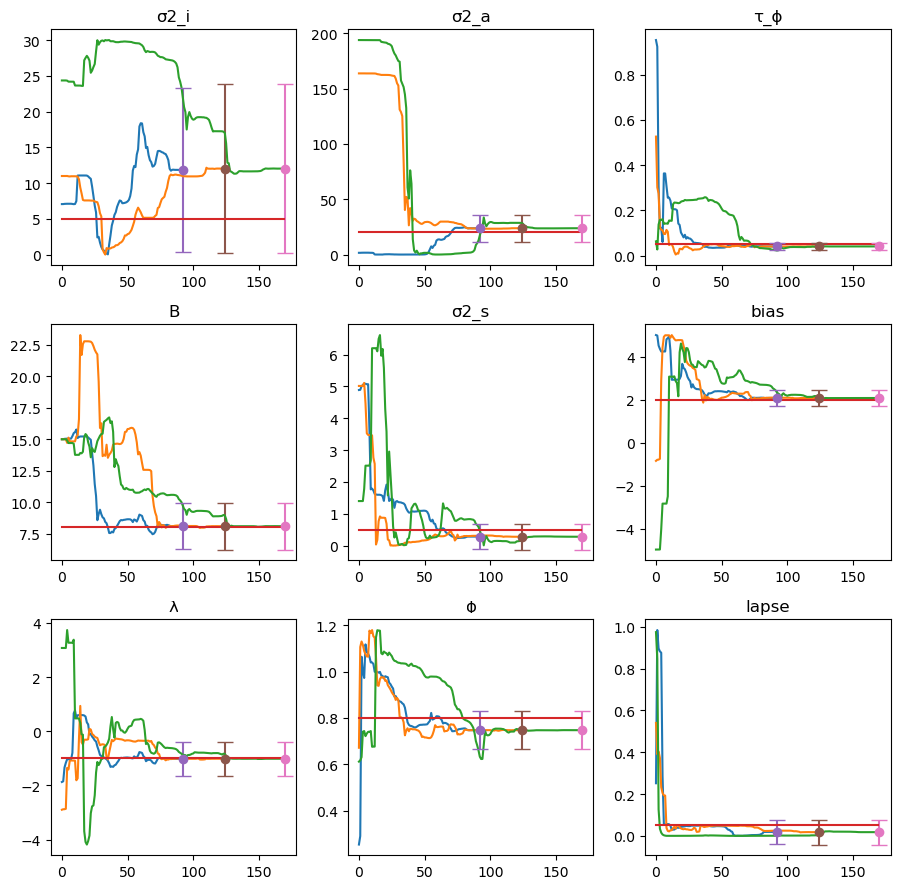

In [28]:
using PyPlot

num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    map(x-> ax[i].plot(x[i,:]), traces[1:3])
    ax[i].plot(collect(Flatten.flatten(θ_generative))[i] * ones(maximum(length.(map(x-> x[i,:], traces[1:3])))))
    ax[i].set_title(name[i])
    
    ax[i].errorbar(size(traces[1], 2), x_fit_20K[1][i], yerr=CIs[1][i], fmt="o",
        capsize=6)
    ax[i].errorbar(size(traces[2], 2), x_fit_20K[2][i], yerr=CIs[2][i], fmt="o",
        capsize=6)
    ax[i].errorbar(size(traces[3], 2), x_fit_20K[3][i], yerr=CIs[3][i], fmt="o",
        capsize=6)
end

tight_layout() 

In [29]:
CIs_20K = map((x,H) -> hcat(collect(Flatten.flatten(x.θ)) - 2 * sqrt.(diag(inv(H))), 
    collect(Flatten.flatten(x.θ)),
    collect(Flatten.flatten(x.θ)) + 2 * sqrt.(diag(inv(H)))), models_20K, H_20K);

In [32]:
map(i-> all((CIs_20K[i][:,1] .< collect(Flatten.flatten(θ_generative))) 
        .&(CIs_20K[i][:,3] .> collect(Flatten.flatten(θ_generative)))), 1:3)

3-element Array{Bool,1}:
 1
 1
 1

## 60K trials

In [33]:
_, data_60K = synthetic_data(n ;θ=θ_generative, ntrials=60_000, rng=1, dt=1e-2);
#_, data = synthetic_data(;θ=θ_syn, ntrials=100_000, rng=2, dt=2e-2);

## Plot

In [46]:
@everywhere ℓℓ(x, n, data) = -pulse_input_DDM.loglikelihood(x, data; n=n)

In [55]:
αs = [range(0.5,stop=8,length=30),
    range(5,stop=20,length=30),
    range(-2,stop=2.,length=30),
    range(2,stop=100,length=30),
    range(0.1,stop=2.,length=30),
    range(0.4,stop=1.1,length=30),
    range(0.005,stop=0.1,length=30),
    range(-1.,stop=3,length=30),
    range(0.0,stop=0.15,length=30)];

In [58]:
LL_scan = map(i-> map(x-> ℓℓ(vcat(x_generative[1:i-1], x, x_generative[i+1:end]), n, data_60K), αs[i]), 1:9);

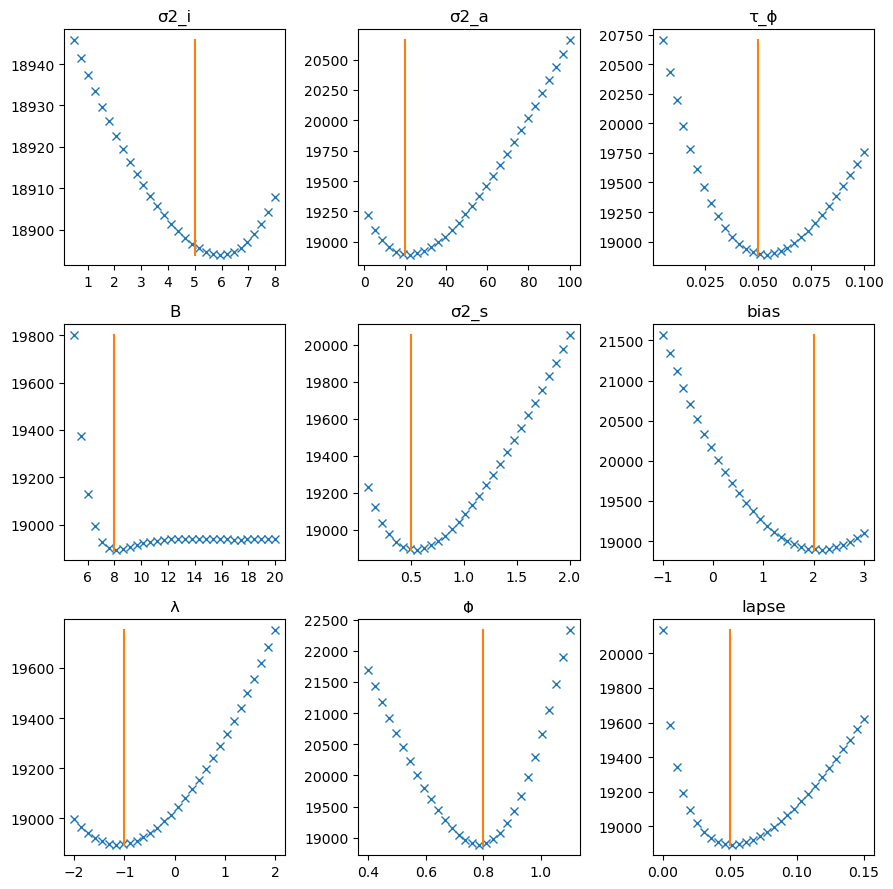

In [68]:
using PyPlot

num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    ax[i].plot(αs[i], LL_scan[i], "x")
    ax[i].set_title(name[i])
    ax[i].plot(x_generative[i]*ones(100), range(minimum(LL_scan[i]), stop=maximum(LL_scan[i]), length=100))
    
    if i == 4
        ax[i].set_xticks(0:20:100)
    elseif i == 1
        ax[i].set_xticks(1:1:8)
    elseif i == 2
        ax[i].set_xticks(6:2:20)
    elseif i == 5
        ax[i].set_xticks(0.5:0.5:2)
    end
    
end

tight_layout() 

## Fit

In [34]:
output = map(rng-> fit_x0(rng, fit, x0, lb, ub, data_60K), 1:3);

Fminbox
-------
Initial mu = 0.0795041

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 0.0795041

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     5.756744e+04     7.380181e+04
 * Current step size: 1.0
 * time: 9.512901306152344e-5
 * g(x): [-141.10179952454422, -138.7546889442505, -2460.750432959682, -311.54439300739654, -541.5267372864881, -3663.4590444409064, 2928.0824060555965, 2202.5655288302214, -73801.811970432]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 * x: [7.081000369861408, 15.0, -1.8729303166393252, 1.581856678112148, 4.886128300795011, 0.25316184259024316, 0.9521567581365553, 4.999046588986136, 0.25

    50     1.891694e+04     3.601650e+02
 * Current step size: 0.5
 * time: 3746.6796300411224
 * g(x): [-0.8170642154360211, -0.6996107954082819, -4.619757969757883, -22.211465016370525, -26.71269694703794, 137.98707805410788, -360.16495504096076, -5.749049137226443, 42.34548574350334]
 * ~inv(H): [4.508962645825321 -0.6992017194652775 0.016497523806290076 -0.01192533070639236 -0.021765193017793772 0.008258446185689269 -0.0012714403782197112 0.059455014910958615 -0.0004852065241949346; -0.6992017194652784 0.4028063021277146 0.0050908278116562344 0.002005922874522879 -0.014182713078989651 -0.002517516862581942 0.0001541454648647726 -0.0169208260936827 0.0003954411068779402; 0.016497523806290104 0.00509082781165629 0.00371529606363218 -0.00011287461667999115 -0.0009780277969111265 1.9604972805356503e-5 8.505728247690749e-6 0.0028369115091632525 9.87370565869177e-6; -0.011925330706392262 0.0020059228745228797 -0.00011287461668004688 0.00011690627337898298 3.167017466923304e-5 -2.39556696

    90     1.890853e+04     6.736935e+01
 * Current step size: 1.0
 * time: 6506.274564027786
 * g(x): [0.20944360227291087, 0.1261402251003186, -0.6012417501013877, -1.0238081640408203, 1.303055568903923, -7.0201270143656815, 67.36935068935047, 0.407020770935312, -8.30653564343802]
 * ~inv(H): [7.6716777299414 -3.1313201506350548 -0.0268658403217442 0.31825092880696026 -0.013361986860848718 0.008354288192989478 -0.004504833530350879 0.14779258562675815 0.00012239484748609796; -3.131320150635059 7.536332459723497 0.01791337435372222 0.25481946778662273 -0.2639606395316018 -0.018148109674010062 -5.7308068951412126e-5 -0.09373352860543697 -0.0005485929397744369; -0.026865840321744154 0.01791337435372222 0.006488804456265842 0.004720059066305193 -0.0009793308324731742 0.0006281366798651367 0.0001646226390094628 0.0025454864255777436 -1.4925391174937601e-5; 0.31825092880696026 0.2548194677866224 0.004720059066305142 0.14886433045758402 -0.04914339424424146 0.001928636241165964 0.0010602430

optimization complete. converged: true 

Fminbox
-------
Initial mu = 0.823619

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 0.823619

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     4.057331e+04     5.320728e+03
 * Current step size: 1.0
 * time: 9.989738464355469e-5
 * g(x): [0.12305451696830771, 23.841014590190532, -203.13484525628604, 1.3259424208769406, 6.218068814349296, -5320.728256358091, 2736.576204118267, -587.2021775771425, 1923.692975694227]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 * x: [11.00389237319773, 15.0, -2.8974356934668744, 163.8676270917991, 5.013711485175227, 0.6712263494997204, 0.52594

    50     1.887193e+04     3.100067e+02
 * Current step size: 1.0
 * time: 3903.481726884842
 * g(x): [-0.4564626699380392, 0.48518220933708844, 1.5833529494727394, -0.26551435012853714, -10.084358452845004, 100.36446583899702, -310.00668618959156, -7.036159339531989, -19.76899259460054]
 * ~inv(H): [1.9776612676712824 0.38892877496280986 0.06422180311496554 0.019269836489382297 0.0024558345312048514 0.007695667205105389 0.0002895042062114714 0.05546670727766577 -0.004059347526956762; 0.38892877496280986 0.1593359524611768 0.036354429665640654 0.3006945992694128 -0.00028825474278931784 -0.0006514691017179448 -0.0007196168436427803 0.02004715966453252 -0.00014455328702258732; 0.06422180311496553 0.03635442966564071 0.02205004622666858 0.050161212714691164 -0.003395735951216377 -0.0001709608530170852 1.3206408459190775e-5 0.005648307603481255 8.421567832289539e-5; 0.019269836489382075 0.30069459926941283 0.050161212714691164 4.072097232414405 -0.08799832025097437 -0.028203479366371687 -

Fminbox iteration 3
-------------------
Calling inner optimizer with mu = 8.23619e-7

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     1.888803e+04     3.371653e+00
 * Current step size: 1.0
 * time: 0.00010800361633300781
 * g(x): [-0.018641935805117225, 0.03369999810853143, -0.02678612146575994, 0.0015270556873892658, -0.21162058694159694, 0.660160137477647, -3.3716530625093335, -0.0009903638409535559, -3.273553934453737]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 * x: [7.090841795919823, 8.182654225197123, -1.071864805927567, 19.53037953765803, 0.5175761103940032, 0.780996670737417, 0.04598137755631674, 2.071109772303946, 0.0454365554230

    40     1.913437e+04     3.488141e+03
 * Current step size: 0.125
 * time: 2642.182315826416
 * g(x): [-5.6646358993626365, 58.418320967896115, -87.03294200096444, -1.5382512565866806, -120.79412815894597, 1102.3542745039767, 650.4878181494663, 20.282506778376543, -3488.1412570033135]
 * ~inv(H): [0.0031479383643092185 -0.0008903058130414921 -0.0005681297892368248 -0.015842104257231995 3.2326088301086517e-6 1.850525502896258e-6 6.493622125639359e-6 -0.00023461503106423024 4.680072798563784e-8; -0.0008903058130414919 0.07179828624599881 -0.005883960879378239 1.148181088846634 0.00037416917927385286 0.00014863074208076987 -0.00022184253276981322 0.0005998342194559539 -7.579016447883746e-6; -0.0005681297892368256 -0.005883960879378218 0.003519682993393624 -0.20184290412882186 -6.658377681744928e-5 -3.778217995960704e-5 1.4716863747439549e-5 -0.00030458604416157297 1.0112198258727592e-6; -0.015842104257231843 1.1481810888466335 -0.20184290412882214 29.157571335344315 0.00296153511190556

    80     1.888607e+04     1.687610e+02
 * Current step size: 1.0
 * time: 5718.091520786285
 * g(x): [0.5278950665845726, -0.21046574051931521, -2.1966441633012446, 0.2998687837727932, 2.5069912757299675, -33.83728082088021, 168.7609847328288, 3.2450913815334794, -22.67273741760577]
 * ~inv(H): [1.2753145672587687 0.04956965159904776 0.05210123734764695 -0.9086076388089777 0.011560918462781962 0.012568021918377742 0.0018180738011604409 0.04030743265496413 -0.004910727632307672; 0.04956965159904768 0.13942574613892098 0.024292025251127513 0.3240211109407469 0.0050758932978612874 -0.0032748064956578766 -0.001313664486267427 0.018822880351172473 0.0019506336858500198; 0.05210123734764687 0.024292025251127492 0.014944988199366847 0.055008292039245774 -0.0025355072303460575 -0.0002860347750168042 -6.43803845503933e-5 0.005818258277451389 0.0001761105463933649; -0.9086076388089777 0.32402111094074704 0.05500829203924584 6.658808130583668 -0.1566938016745287 -0.03242883466979728 -0.00641649

Fminbox iteration 3
-------------------
Calling inner optimizer with mu = 1.92221e-7

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     1.888803e+04     6.323345e-01
 * Current step size: 1.0
 * time: 0.00011086463928222656
 * g(x): [0.0019726515484725766, 0.05760966676300899, 0.006743215421841043, 0.00353152043000983, 0.13205531419576705, 0.6323344847399248, 0.1159557842655575, -0.04728601705640407, -0.18345616138447168]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 * x: [7.142636073374371, 8.198058807612595, -1.0680745560903335, 19.487184892173484, 0.5193577369205951, 0.7815878689001655, 0.046009506162779594, 2.0742974125178897, 0.04536853033

In [35]:
traces_60K = map(y-> hcat(map(x-> x.metadata["x"], y[2].trace)...), output)

3-element Array{Array{Float64,2},1}:
 [7.081000369861408 7.0820768911590495 … 3.1673529554766118 3.1673529426112093; 15.0 15.001058614265016 … 27.911215714269247 27.91121562554202; … ; 4.999046588986136 4.98224234758576 … 2.255414657464257 2.255414508189249; 0.25166218303197185 0.8147253236755265 … 0.05138356414297567 0.05137894472617461]   
 [11.00389237319773 11.003884862546059 … 7.090841875135999 7.090842442280811; 15.0 14.998544859949329 … 8.182654051878133 8.182653015722796; … ; -0.8413043188939673 -0.8054643422352061 … 2.071109612864282 2.0711090850202525; 0.54015152302257 0.42273862167404536 … 0.045447902258920175 0.04544868336542406] 
 [24.350952149875845 24.350913552758016 … 7.142635880727269 7.142635844933809; 15.0 15.000038085094914 … 8.198054047632505 8.198053925035762; … ; -4.9574203939948465 -4.957268298190325 … 2.074301434854558 2.0743016525095195; 0.9746379934512355 0.7802734442962866 … 0.04537633807334806 0.045369001205717886]

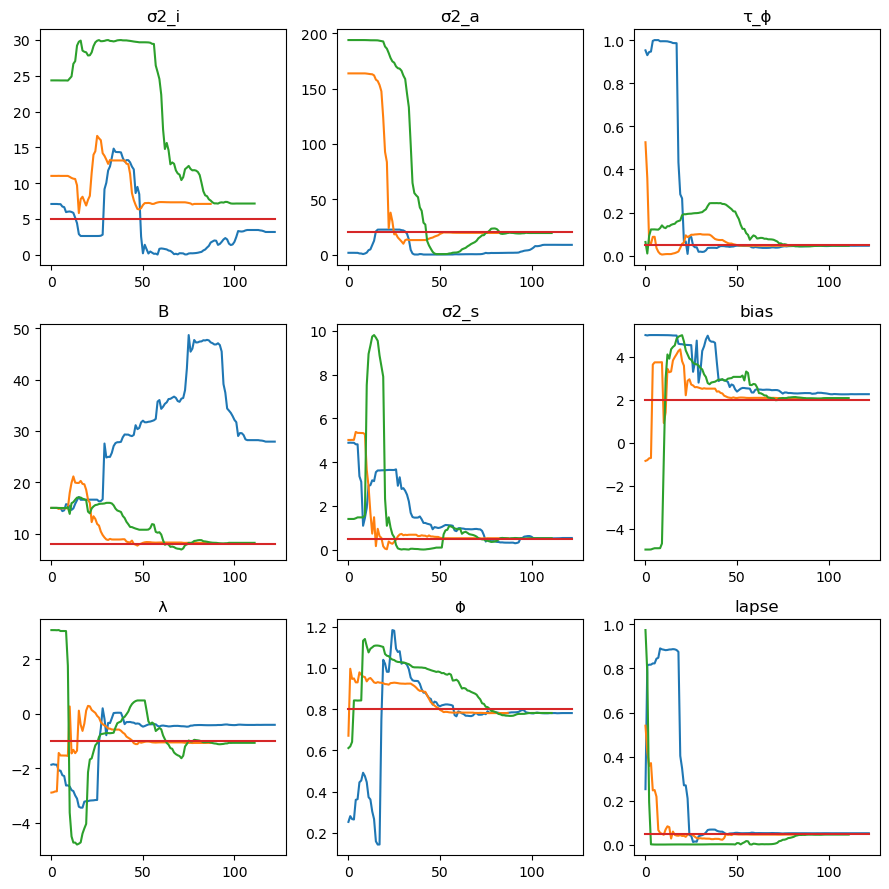

In [36]:
using PyPlot

num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    map(x-> ax[i].plot(x[i,:]), traces_60K)
    ax[i].plot(collect(Flatten.flatten(θ_generative))[i] * ones(maximum(length.(map(x-> x[i,:], traces_60K)))))
    ax[i].set_title(name[i])
    
end

tight_layout() 

In [37]:
models_60K = map(y-> y[1], output)

3-element Array{choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}},1}:
 choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}}
  θ: θchoice{θz{Float64},Float64}
  data: Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}}((60000,))

 choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}}
  θ: θchoice{θz{Float64},Float64}
  data: Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}}((60000,))

 choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}}
  θ: θchoice{θz{Float64},Float64}
  data: Array{choicedata{pulse_input_DDM.choiceinputs{pul

In [39]:
H_60K = map(x-> Hessian(x), models_60K);

In [40]:
eigvals.(H_60K)

3-element Array{Array{Float64,1},1}:
 [-0.0042570934063294145, 0.07335627096639982, 0.22635458133643133, 57.09712435648986, 117.7955345662742, 795.5615704839755, 2152.234936739193, 218403.4729625005, 1.5535607224691794e6]
 [0.07117987896933757, 0.1805653013105409, 4.816954824706602, 64.29102289973841, 163.51660231659585, 1341.4992437780302, 2332.7568090800974, 227350.7587300997, 1.5560163293812787e6]   
 [0.07115903903187931, 0.1799971693347617, 4.788676804971517, 64.43995311402908, 162.7346635053735, 1336.6807395202861, 2338.288958484701, 227319.6858807229, 1.550866457796186e6]      

In [41]:
x_fit_60K = collect.(Flatten.flatten.(models_60K))

3-element Array{Array{Float64,1},1}:
 [3.1673529426112093, 27.91121562554202, -0.4060071639570192, 8.775769673768469, 0.5291020335362607, 0.7811037877478852, 0.04597031338531456, 2.255414508189249, 0.05137894472617461]
 [7.090842442280811, 8.182653015722796, -1.0718629967302624, 19.53037901228334, 0.5175803191009517, 0.7809977078285435, 0.04598166987179244, 2.0711090850202525, 0.04544868336542406]
 [7.142635844933809, 8.198053925035762, -1.068075331235247, 19.487184569030404, 0.519345649570371, 0.7815332980453897, 0.04599883062967689, 2.0743016525095195, 0.045369001205717886]

In [42]:
CIs_2 = map(H -> 2 * sqrt.(diag(inv(H))), H_60K[2:3])

2-element Array{Array{Float64,1},1}:
 [4.751916223519948, 1.0730008394724138, 0.370524837894387, 7.435874492110823, 0.23953877663117995, 0.049146023742019276, 0.01034474373644427, 0.2202781299622422, 0.011062759006538858] 
 [4.756888633229372, 1.079246894644587, 0.37027969253261805, 7.437932960479954, 0.23948670164995872, 0.04907753482498146, 0.010353998585388257, 0.2205540202787435, 0.011616080440395915]

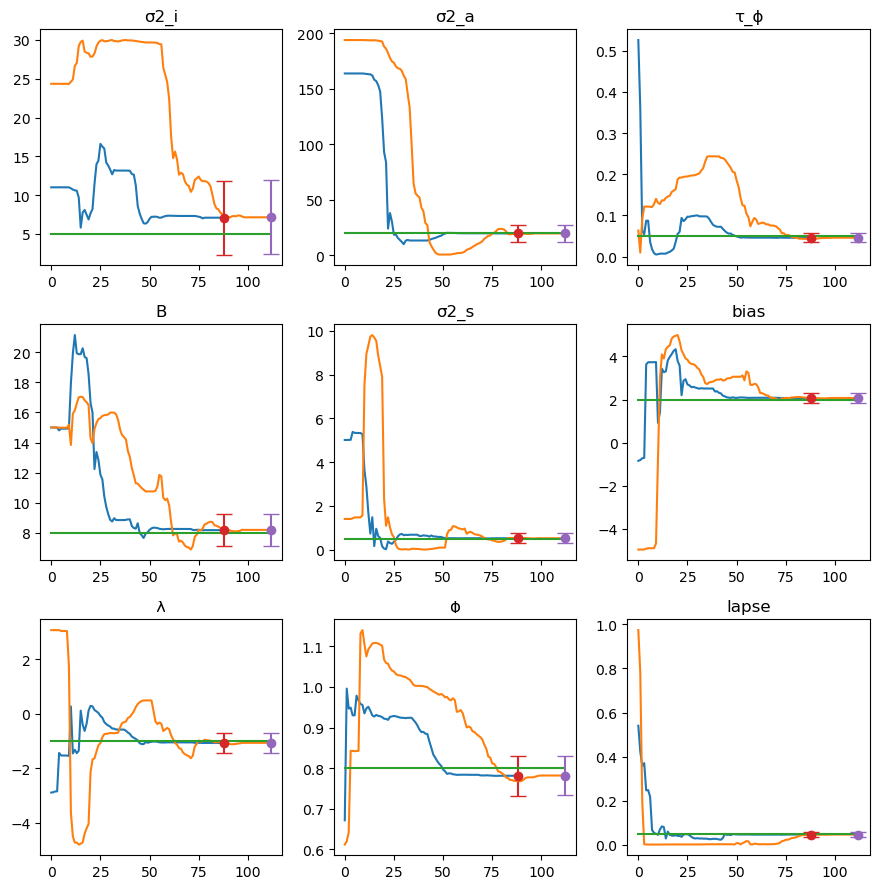

In [168]:
num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    map(x-> ax[i].plot(x[i,:]), traces_60K[2:3])
    ax[i].plot(collect(Flatten.flatten(θ_generative))[i] * ones(maximum(length.(map(x-> x[i,:], traces_60K[2:3])))))
    ax[i].set_title(name[i])
    ax[i].errorbar(size(traces_60K[2], 2), CIs_2[1][i,2], yerr=blah[i], fmt="o",
        capsize=6)
    ax[i].errorbar(size(traces_60K[3], 2), CIs_2[2][i,2], yerr=blah[i], fmt="o",
        capsize=6)
    
end

tight_layout() 

In [44]:
CIs_60K = map((x,H) -> hcat(collect(Flatten.flatten(x.θ)) - 2 * sqrt.(diag(inv(H))), 
    collect(Flatten.flatten(x.θ)),
    collect(Flatten.flatten(x.θ)) + 2 * sqrt.(diag(inv(H)))), models_60K[2:3], H_60K[2:3]);

In [45]:
map(i-> all((CIs_60K[i][:,1] .< collect(Flatten.flatten(θ_generative))) .& 
        (CIs_60K[i][:,3] .> collect(Flatten.flatten(θ_generative)))), 1:2)

2-element Array{Bool,1}:
 1
 1

## Look at LL landscape

In [69]:
αs = 20e0 *collect(-0.2:0.01:0.2)
xs_neural = map(y-> x_fit_60K[1] + y * eigvecs(H_60K[1])[:,1], αs);

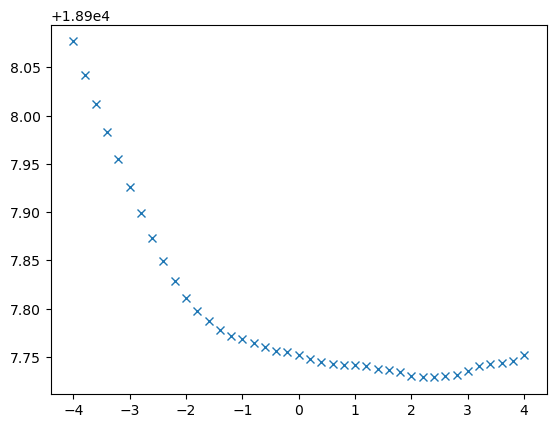

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa789e94668>

In [71]:
LL_steps_neural = map(y-> (!any((y .< lb) .| (y .> ub)) ? ℓℓ(y, n, data_60K) : -Inf), xs_neural);
finite_LL_steps_neural = filter(isfinite, LL_steps_neural);
finite_αs = αs[isfinite.(LL_steps_neural)];
plot(αs, LL_steps_neural, "x")

In [72]:
x_restart = x_fit_60K[1] + αs[argmin(LL_steps_neural)] * eigvecs(H_60K[1])[:,1]

9-element Array{Float64,1}:
  3.109783334955107   
 26.020942805417807   
 -0.4059691366600157  
  9.89976542420455    
  0.5428041990269344  
  0.7808408773299687  
  0.045958448850258966
  2.255043683430925   
  0.051413826541096184

## Restart fits

In [ ]:
model_restart = optimize(data_60K, choiceoptions(x0=x_restart, fit=fit, lb=lb, ub=ub); 
    f_tol=1e-15, x_tol=1e-12, g_tol=1e-4, extended_trace=true, show_trace=true)[1];

Fminbox
-------
Initial mu = 0.00223499

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 0.00223499

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     1.890768e+04     7.387622e+01
 * Current step size: 1.0
 * time: 4.00543212890625e-5
 * g(x): [-0.10015108492501382, -0.07638127567538666, -0.08473774494048976, -0.09305128996941353, -3.403112706254361, 14.641906402083663, -73.87622320408806, -0.005142890611165027, -26.28907498381092]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 * x: [3.109783334955107, 26.020942805417807, -0.4059691366600157, 9.89976542420455, 0.5428041990269344, 0.7808408773299687, 0.04595844885025896

    50     1.890768e+04     5.047718e-03
 * Current step size: 0.42345286789315245
 * time: 5244.08952999115
 * g(x): [-1.8697984966061214e-7, 2.6712310440123855e-5, -2.0128382720042867e-5, 7.97463007658661e-7, 0.00037909300828273653, -0.000830035694507244, 0.005047717590103654, 2.1053648833405233e-5, 0.002071354586995172]
 * ~inv(H): [3.6635596416266605 -0.23703010943185743 -0.06693075225318204 2.172623437213285 -0.017809640476001386 -0.02635250912507286 -0.011004636202040967 0.11743831199488533 -0.0005420442708472554; -0.23703010943185787 0.5212347626900591 0.004148841471133228 -0.5315176101343944 0.010235246427353538 0.004387831114123138 0.0008643378670470567 0.0019581372510602407 -0.00014696272600040519; -0.06693075225318204 0.004148841471133277 0.00714960267059667 -0.06250870513239407 0.0005513176459135008 0.0007747311757934262 0.00027950642275149614 0.0002760426763692156 -4.7867153726817604e-6; 2.1726234372132804 -0.5315176101343939 -0.06250870513239416 6.10887302053141 -0.055152

In [78]:
model_restart

choiceDDM{θchoice{θz{Float64},Float64},Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}},1}}
  θ: θchoice{θz{Float64},Float64}
  data: Array{choicedata{pulse_input_DDM.choiceinputs{pulse_input_DDM.clicks,pulse_input_DDM.binned_clicks}}}((60000,))


In [ ]:
H_restart = Hessian(model_restart);

In [77]:
eigvals(H_restart)

9-element Array{Float64,1}:
     -0.00364541597050126 
      0.07030043957664718 
      0.21210575348442096 
     55.88571165267905    
    118.0169829839933     
    809.2878967155236     
   2147.5570657345747     
 218574.08166558758       
      1.5412981808142504e6

## Restart again

In [81]:
x_restart

9-element Array{Float64,1}:
  3.109783334955107   
 26.020942805417807   
 -0.4059691366600157  
  9.89976542420455    
  0.5428041990269344  
  0.7808408773299687  
  0.045958448850258966
  2.255043683430925   
  0.051413826541096184

In [82]:
x_restart[2] = 8.

8.0

In [ ]:
model_restart_2 = optimize(data_60K, choiceoptions(x0=x_restart, fit=fit, lb=lb, ub=ub); 
    f_tol=1e-15, x_tol=1e-12, g_tol=1e-4, extended_trace=true, show_trace=true)[1];

Fminbox
-------
Initial mu = 0.399123

Fminbox iteration 1
-------------------
Calling inner optimizer with mu = 0.399123

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     1.899536e+04     1.348644e+04
 * Current step size: 1.0
 * time: 6.699562072753906e-5
 * g(x): [-28.826506560478595, -2.9039081891140883, 66.5860915221884, -15.74513403777807, -703.5787653636904, 2600.063633317108, -13486.435480927756, -57.749656716918466, -4261.076957192983]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0]
 * x: [3.109783334955107, 8.0, -0.4059691366600157, 9.89976542420455, 0.5428041990269344, 0.7808408773299687, 0.045958448850258966, 2.255043683430925, 0.0514


Exiting inner optimizer with x = [7.210611694347384, 8.222235405284579, -1.0616607613376943, 19.54263412852271, 0.5188883467183915, 0.7822044753492112, 0.046046296158710164, 2.077874838398186, 0.04532408354461708]
Current distance to box: 0.0410463
Decreasing barrier term μ.

Fminbox iteration 2
-------------------
Calling inner optimizer with mu = 0.000399123

(numbers below include barrier contribution)
Iter     Function value   Gradient norm 
     0     1.888803e+04     9.294605e+00
 * Current step size: 1.0
 * time: 6.890296936035156e-5
 * g(x): [0.03779754629214058, 0.05968113817573228, 0.0354651457136764, 0.018187705080883434, 0.7259131210988343, -0.44367987895982725, 9.2946050918089, -0.0801642028593744, 8.378844549297884]
 * ~inv(H): [1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 

## Different generative parameters

In [ ]:
θ_generative_2 = θchoice(θz=θz(σ2_i = 1., B = 20., λ = -0.5, σ2_a = 0., σ2_s = 1.5,
    ϕ = 0.4, τ_ϕ = 0.02), bias=0., lapse=0.0);

In [ ]:
x_generative_2 = collect(Flatten.flatten(θ_generative_2));

In [ ]:
_, data_20K_2 = synthetic_data(n ;θ=θ_generative_2, ntrials=20_000, rng=1, dt=1e-2);

In [ ]:
αs = [range(0.1,stop=3,length=30),
    range(15,stop=25,length=30),
    range(-2,stop=2.,length=30),
    range(0,stop=50,length=30),
    range(0.5,stop=25.,length=30),
    range(0.1,stop=0.6,length=30),
    range(0.005,stop=0.05,length=30),
    range(-1.,stop=1,length=30),
    range(0.0,stop=0.15,length=30)];

In [ ]:
LL_scan_2 = map(i-> map(x-> ℓℓ(vcat(x_generative_2[1:i-1], x, x_generative_2[i+1:end]), n, data_20K_2), αs[i]), 1:9);

In [ ]:
num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    ax[i].plot(αs[i], LL_scan_2[i], "x")
    ax[i].set_title(name[i])
    ax[i].plot(x_generative_2[i]*ones(100), range(minimum(LL_scan_2[i]), stop=maximum(LL_scan_2[i]), length=100))
    
    if i == 4
        ax[i].set_xticks(0:20:100)
    elseif i == 1
        ax[i].set_xticks(1:1:8)
    elseif i == 2
        ax[i].set_xticks(6:2:20)
    elseif i == 5
        ax[i].set_xticks(0.5:0.5:2)
    end
    
end

tight_layout() 

In [ ]:
loglikelihood(θ_generative_2, data_20K_2)

In [ ]:
output = map(rng-> fit_x0(rng, fit, x0, lb, ub, data_20K_2), 1:3);

In [ ]:
traces_20K_2 = map(y-> hcat(map(x-> x.metadata["x"], y[2].trace)...), output)

In [ ]:
num_rows, num_cols = 3,3
fig, ax = subplots(num_rows, num_cols, figsize=(9,9))
name = ["σ2_i", "B", "λ", "σ2_a", "σ2_s", "ϕ", "τ_ϕ", "bias", "lapse"]

for i in 1:9
                  
    map(x-> ax[i].plot(x[i,:]), traces_20K_2)
    ax[i].plot(collect(Flatten.flatten(θ_generative_2))[i] * ones(maximum(length.(map(x-> x[i,:], traces_20K_2)))))
    ax[i].set_title(name[i])
    
end

tight_layout() 